<a href="https://colab.research.google.com/github/vainov05/E-commerceRecommenderSystem/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd

colnames=['User_ID', 'Product_ID', 'Rating', 'Date'] 
product = pd.read_csv('ratings_Electronics.csv', names=colnames, header=None)


product.head()

,User_ID,Product_ID,Rating,Date
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [70]:
product = product.drop(columns=['Date'])

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


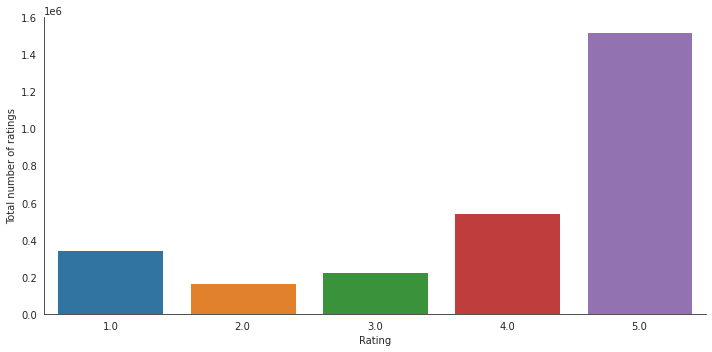

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the rating
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=product, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [72]:
print("Total data ")
print("\nTotal number of ratings :",product.shape[0])
print("Total number of Users   :", len(np.unique(product.User_ID)))
print("Total number of products  :", len(np.unique(product.Product_ID)))

Total data 

Total number of ratings : 2806030
Total number of Users   : 1826192
Total number of products  : 153668


In [73]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = product.groupby(by='User_ID')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

User_ID
A5JLAU2ARJ0BO     460
A6FIAB28IS79      315
A3OXHLG6DIBRW8    285
A231WM2Z2JL0U3    252
A680RUE1FDO8B     222
Name: Rating, dtype: int64

In [74]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=product.groupby("Product_ID").filter(lambda x:x['Rating'].count() >=50)

In [75]:
#Average rating of the product 

new_df.groupby('Product_ID')['Rating'].mean().head()

Product_ID
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: Rating, dtype: float64

In [76]:
new_df.groupby('Product_ID')['Rating'].mean().sort_values(ascending=False).head()

Product_ID
B002E6R7NG    4.980392
B000TMFYBO    4.953125
B0000DYV9H    4.947368
B000053HC5    4.945783
B002A6G3V2    4.921875
Name: Rating, dtype: float64

In [77]:
#Total no of rating for product

new_df.groupby('Product_ID')['Rating'].count().sort_values(ascending=False).head()

Product_ID
B0019EHU8G    12285
B0002L5R78     9487
B000LRMS66     8715
B002MAPRYU     6599
B0012S4APK     5642
Name: Rating, dtype: int64

In [78]:
ratings_mean_count = pd.DataFrame(new_df.groupby('Product_ID')['Rating'].mean())

In [79]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('Product_ID')['Rating'].count())

In [80]:
ratings_mean_count.head()

,Rating,rating_counts
Product_ID,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


In [81]:
new_product_df=new_df.head(10000)
ratings_matrix = new_product_df.pivot_table(values='Rating', index='User_ID', columns='Product_ID', fill_value=0)
ratings_matrix.head()

Product_ID,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
User_ID,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
ratings_matrix.shape

(9832, 76)

In [83]:
#Transposing the matrix

X = ratings_matrix.T
X.head()

User_ID,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
Product_ID,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
X.shape

(76, 9832)

In [85]:
X1 = X

In [86]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(76, 10)

In [87]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(76, 76)

In [88]:
X.index[55]

'B00000JBAT'

In [89]:
i = "B00000JBAT"

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

55

In [90]:
#Correlation for all items with the item purchased by this customer based on items rated by other customers who bought the similar product

correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(76,)

In [91]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removing the items bought by the customer B00000JBAT
Recommend.remove(i) 

Recommend[0:10]

['7214047977',
 '9983891212',
 '9984984354',
 '9985511476',
 'B00000IGBF',
 'B00000J1SC',
 'B00000J1TX',
 'B00000J1U8',
 'B00000J434',
 'B00000J4EY']